In [53]:
import nltk
from nltk.parse.generate import generate
from nltk.tokenize import word_tokenize

In [11]:
#the grammar rules to be used: 

grammar1 = nltk.CFG.fromstring("""
S -> NP VP
VP -> V NP | V NP PP
PP -> P NP
V -> "saw" | "ate" | "walked"
NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
Det -> "a" | "an" | "the" | "my"
N -> "man" | "dog" | "cat" | "telescope" | "park"
P -> "in" | "on" | "by" | "with"
""")


grammar2 = nltk.CFG.fromstring("""
S -> NP VP
NP -> Det Nom | PropN
Nom -> Adj Nom | N
VP -> V Adj | V NP | V S | V NP PP
PP -> P NP
PropN -> "Buster" | "Chatterer" | "Joe"
Det -> "the" | "a"
N -> "bear" | "squirrel" | "tree" | "fish"
Adj -> "angry" | "frightened" | "little" | "tall"
V -> "chased" | "said" | "thought" | "was" | "put"
P -> "on"
""")

In [22]:
print(grammar2)

Grammar with 29 productions (start state = S)
    S -> NP VP
    NP -> Det Nom
    NP -> PropN
    Nom -> Adj Nom
    Nom -> N
    VP -> V Adj
    VP -> V NP
    VP -> V S
    VP -> V NP PP
    PP -> P NP
    PropN -> 'Buster'
    PropN -> 'Chatterer'
    PropN -> 'Joe'
    Det -> 'the'
    Det -> 'a'
    N -> 'bear'
    N -> 'squirrel'
    N -> 'tree'
    N -> 'fish'
    Adj -> 'angry'
    Adj -> 'frightened'
    Adj -> 'little'
    Adj -> 'tall'
    V -> 'chased'
    V -> 'said'
    V -> 'thought'
    V -> 'was'
    V -> 'put'
    P -> 'on'


In [86]:
lst = []
for sentence in generate(grammar1, n=2, depth = 4 ):
    lst.append(' '.join(sentence))
    print(' '.join(sentence))
                

John saw John
John saw Mary


In [50]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hamda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [78]:
for i in lst:
    print(word_tokenize(i))
    sent = word_tokenize(i)
    rd_parser = nltk.RecursiveDescentParser(grammar1)
    for tree in rd_parser.parse(sent):
        print(tree)
        tree.draw()
                                        
        
    
        
    
        


['John', 'saw', 'John']
(S (NP John) (VP (V saw) (NP John)))
['John', 'saw', 'Mary']
(S (NP John) (VP (V saw) (NP Mary)))


In [43]:
for sentence in generate(grammar2, depth = 4 , n =2):
    print(' '.join(sentence))
                

Buster chased angry
Buster chased frightened


In [87]:
def input_grammar(grammar):
    lst = []
    for sentence in generate(grammar, n=2, depth = 4 ):
        lst.append(' '.join(sentence))
    
    
    
    
    for i in lst:
        print(word_tokenize(i))
        sent = word_tokenize(i)
        rd_parser = nltk.RecursiveDescentParser(grammar)
        for tree in rd_parser.parse(sent):
            print(tree)
            tree.draw()
    
    

In [89]:
input_grammar(grammar1)

['John', 'saw', 'John']
(S (NP John) (VP (V saw) (NP John)))
['John', 'saw', 'Mary']
(S (NP John) (VP (V saw) (NP Mary)))


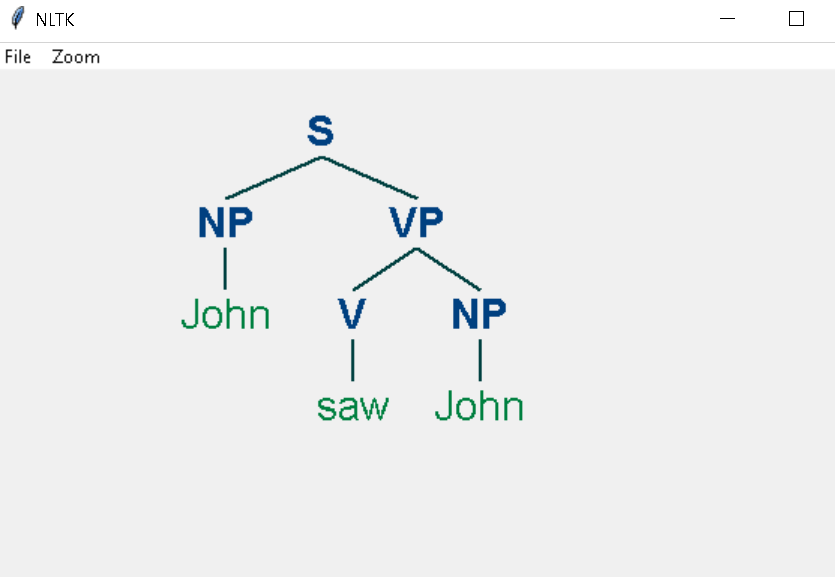

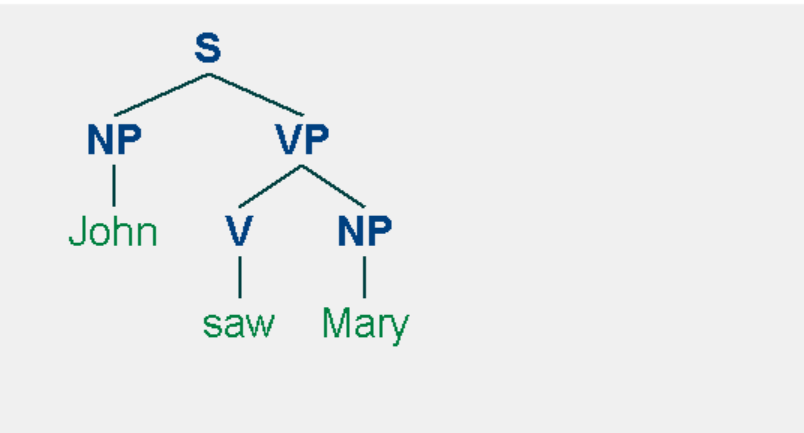

In [92]:
input_grammar(grammar2)

['Buster', 'chased', 'angry']
(S (NP (PropN Buster)) (VP (V chased) (Adj angry)))
['Buster', 'chased', 'frightened']
(S (NP (PropN Buster)) (VP (V chased) (Adj frightened)))


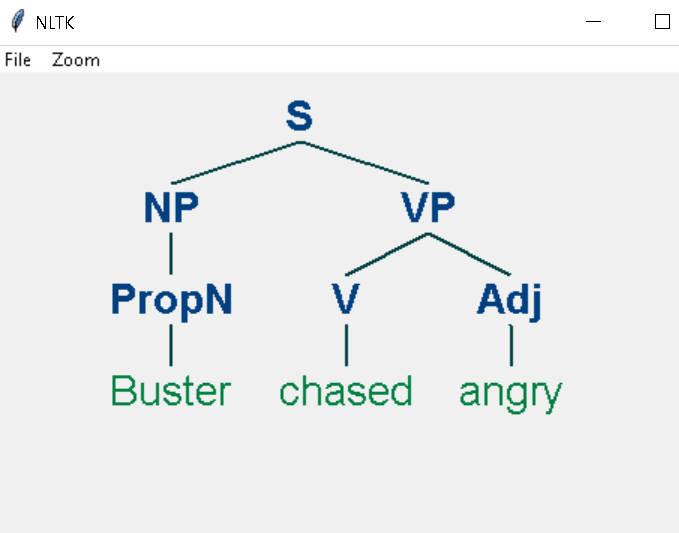

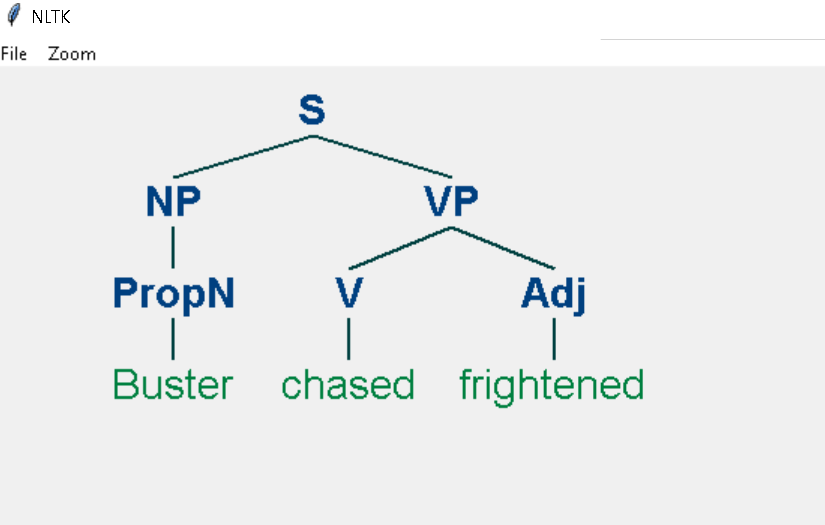